# Aula Alura

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

dados = pd.read_csv(url, sep=';')
dados_df = pd.DataFrame(dados)
dados_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


<Axes: ylabel='Tipo'>

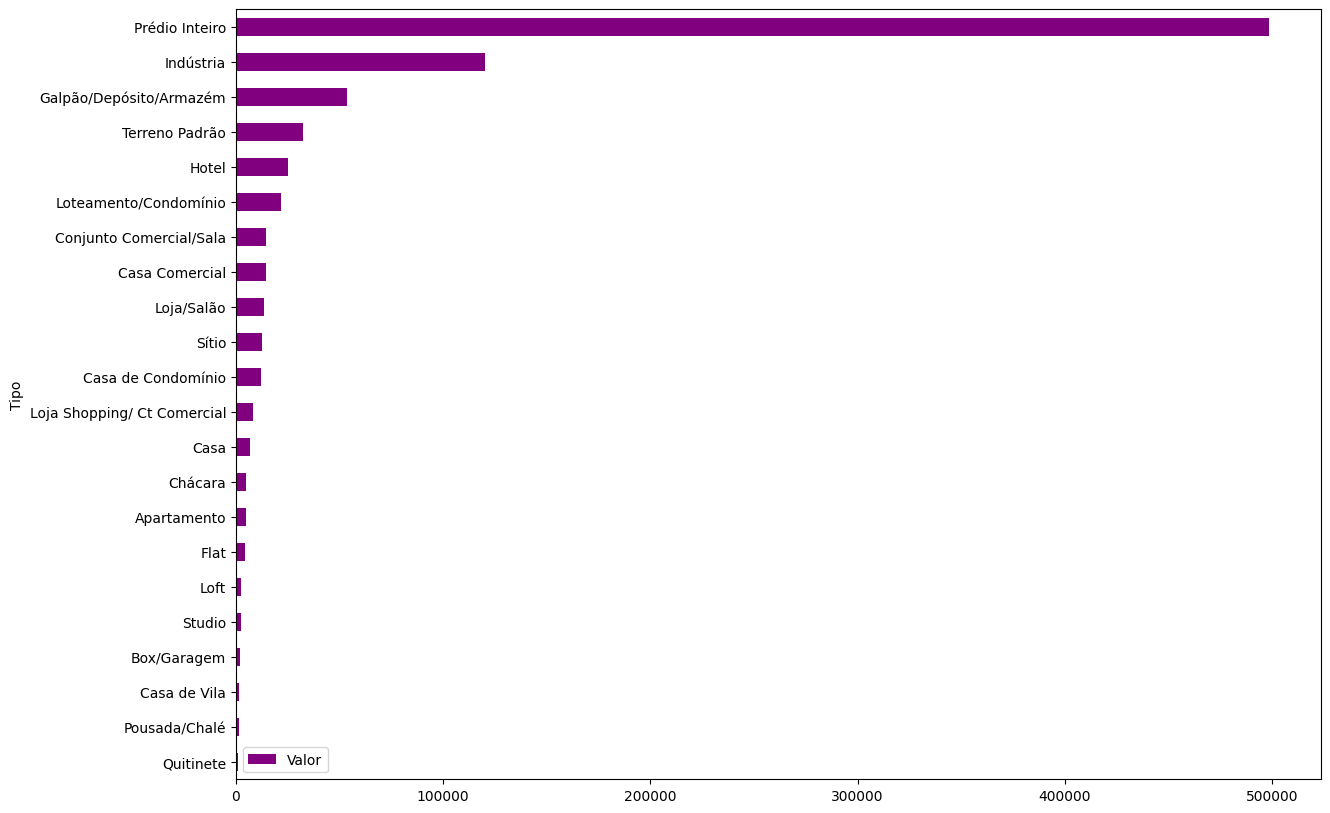

In [ ]:
dados_agrupados = dados_df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
dados_agrupados.plot(kind='barh', figsize=(14,10), color='purple')

<Axes: ylabel='Tipo'>

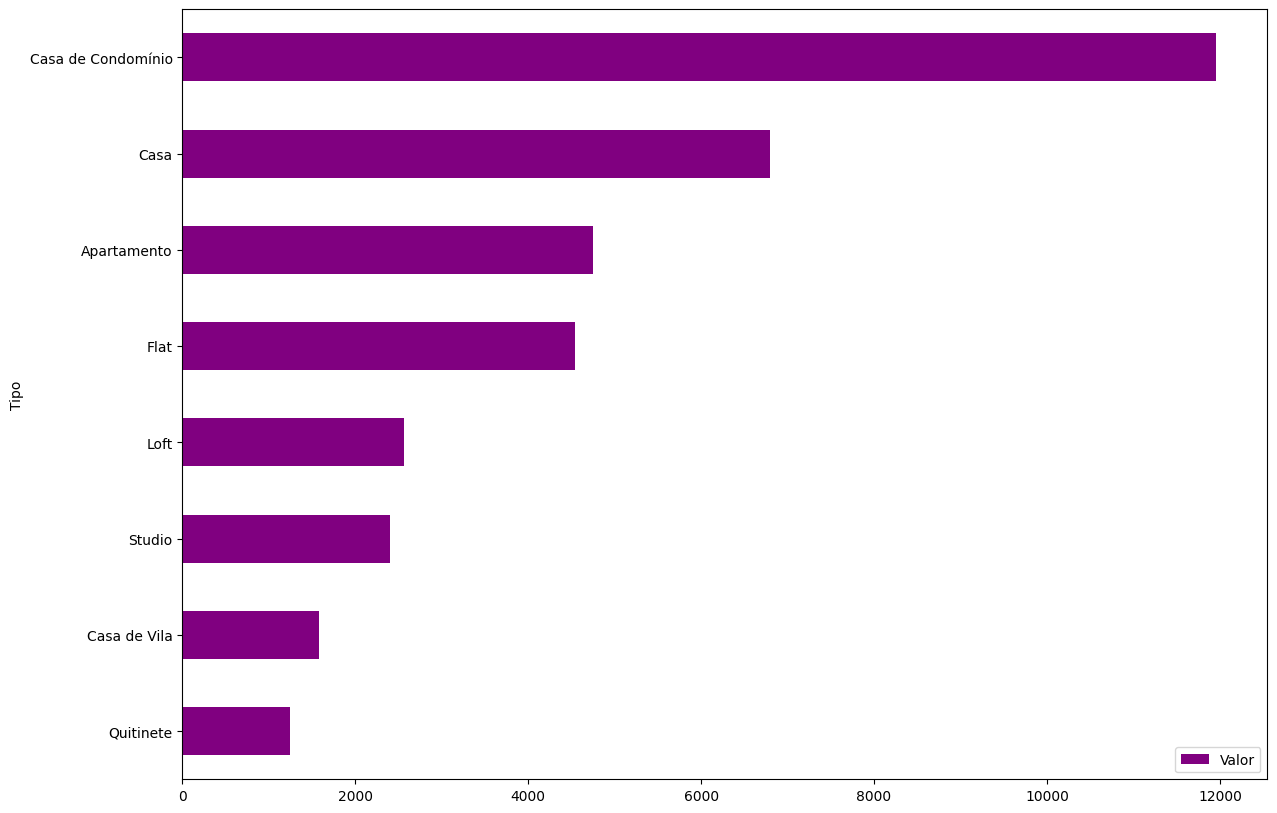

In [ ]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

residenciais = dados.query('@imoveis_comerciais not in Tipo')
residenciais_df = residenciais.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
residenciais_df.plot(kind='barh', figsize=(14,10), color='purple')


<Axes: xlabel='Tipo', ylabel='Porcentagem'>

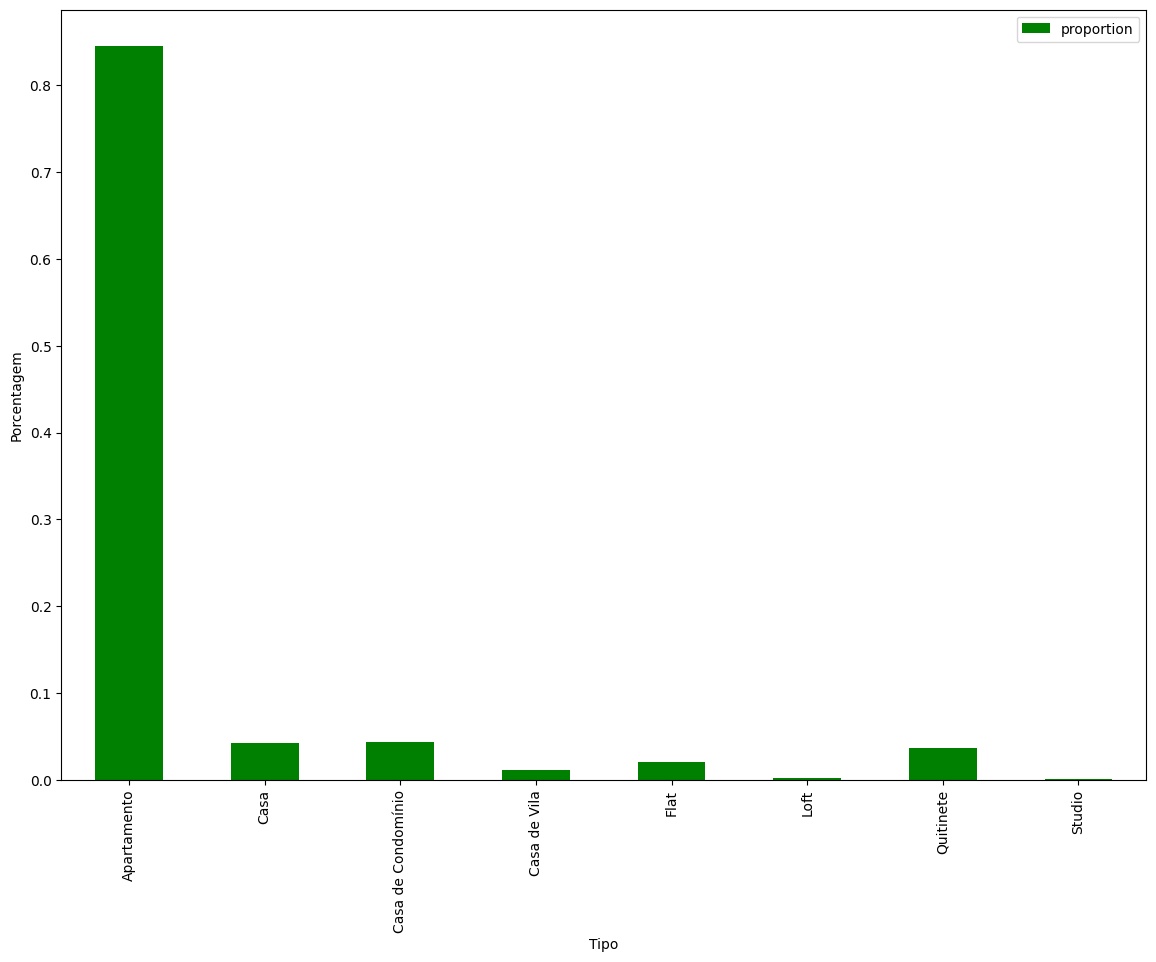

In [ ]:
res_df = residenciais.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')
res_df.plot(kind='bar', figsize=(14,10), color='green',xlabel='Tipo', ylabel='Porcentagem')

In [ ]:
apartamentos = residenciais.query('Tipo == "Apartamento"')
apartamentos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
# Verificar se existe algum dado nulo
apartamentos.isnull().sum()

# Substituindo os dados nulos
apartamentos = apartamentos.fillna(0)

# Verificando
apartamentos.isnull().sum()


Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [ ]:
# Index de todos os apartamentos com Valor ou Condominio zerados
registros_remover = apartamentos.query('Valor == 0 | Condominio == 0').index

# Realizando a exclusão dos registros zerados
apartamentos.drop(registros_remover, axis=0, inplace=True)

# Exclusão da coluna Tipo
apartamentos.drop('Tipo',axis=1,inplace=True)

In [ ]:
# Procura por Apartamentos com 1 Quarto e aluguel de ate R$1200

um_quarto = apartamentos['Quartos'] == 1
aluguel_abaixo_1200 = apartamentos['Valor'] < 1200
resultado = (um_quarto) & (aluguel_abaixo_1200)
data1 = apartamentos[resultado]

In [ ]:
# Apartamentos com dois quartos, aluguel abaixo de R$3000 e área maior que 70
dois_quartos = apartamentos['Quartos'] == 2
aluguel_abaixo_3000 = apartamentos['Valor'] < 3000
area_maior_70 = apartamentos['Area'] > 70

resultado2 = (dois_quartos) & (aluguel_abaixo_3000) & (area_maior_70)
data2 = apartamentos[resultado2]

In [ ]:
# Salvando a Planilha em csv
apartamentos.to_csv('dados_apartamentos.csv', index=False, sep=';')

pd.read_csv('dados_apartamentos.csv', sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
# Criação da coluna "Valor Mensal" contendo o Valor + Condominio // Uso da tabela original, anterior ao do estudo com apartamentos
dados_df['Valor_Mensal'] = dados_df['Valor'] + dados_df['Condominio']
dados_df.head()

# Criação da coluna "Valor Anual" contendo o Valor Mensal * 12 + IPTU
dados_df['Valor_Anual'] = dados_df['Valor_Mensal'] * 12 + dados_df['IPTU']
dados_df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_Mensal,Valor_Anual
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


In [ ]:
# Criando colunas categoricas / Criação da coluna descrição onde contem o Tipo, bairro, quartos e vagas de estacionamento
dados_df['Descricao'] = dados_df['Tipo'] + " em " + dados_df['Bairro'] + " com " + dados_df['Quartos'].astype(str) + " quarto(s) e " + dados_df['Vagas'].astype(str) + " vaga(s) de estacionamento"
dados_df.head()

# Criando a coluna " Possui Suite " para verificar se possui ou não uma ou mais suites
dados_df['Possui_Suite'] = dados_df['Suites'].apply(lambda x: 'Sim' if x > 0 else 'Não')
dados_df.head()

# Salvando a tabela
dados_df.to_csv('tabela_para_devs.csv', index=False, sep=';')

# Exercicios Alura

In [ ]:
data1.to_csv('dados_apartamentos_1quarto_1200aluguel.csv', index=False, sep=';')
data2.to_csv('dados_apartamentos_2quartos_3000aluguel_70area.csv', index=False, sep=';')

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'

dados = pd.read_csv(url)

dados.head(7)
dados.tail(5)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 578.0+ bytes


In [ ]:
# Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

dados.isnull().sum()
dados.fillna(0, inplace=True)

In [ ]:
# Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.
dados.drop([8,7], axis=0, inplace=True)
dados

,Nome,Idade,Notas,Aprovado,Pontos_Extras
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0
5,Bruna,23,0.0,False,0.0
6,Dara,21,7.0,True,2.8
9,Vitor,28,0.0,False,0.0
10,Daniel,21,0.0,False,0.0
11,Igor,24,4.5,False,1.8


In [ ]:
# Aplique um filtro que selecione apenas os alunos que foram aprovados.

alunos_aprovados = dados['Aprovado'] == True
data_alunos_aprovados = dados[alunos_aprovados]
data_alunos_aprovados = data_alunos_aprovados.replace(7.0, 8.0)

In [ ]:
#  Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".
data_alunos_aprovados.to_csv('alunos_aprovados.csv', index=False)

In [ ]:
# Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles.
# Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.

dados['Pontos_Extras'] = dados['Notas'].apply(lambda x: (x * 40) / 100)
dados

,Nome,Idade,Notas,Aprovado,Pontos_Extras
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0
5,Bruna,23,0.0,False,0.0
6,Dara,21,7.0,True,2.8
9,Vitor,28,0.0,False,0.0
10,Daniel,21,0.0,False,0.0
11,Igor,24,4.5,False,1.8


In [ ]:
# Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.
dados['Notas_finais'] = dados['Notas'] + dados['Pontos_Extras']
dados['Notas_finais'] = dados['Notas_finais'].apply(lambda x: 10 if x > 10 else x)

#Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final"

dados['Aprovado_final'] = dados['Notas_finais'].apply(lambda x: 'Aprovado' if x > 6 else 'Reprovado')
dados.drop('Aprovado', axis=1, inplace=True)
dados

,Nome,Idade,Notas,Pontos_Extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,3.0,10.0,Aprovado
1,Ana,18,0.0,0.0,0.0,Reprovado
2,Cátia,27,2.5,1.0,3.5,Reprovado
3,Denis,18,5.0,2.0,7.0,Aprovado
4,Beto,21,10.0,4.0,10.0,Aprovado
5,Bruna,23,0.0,0.0,0.0,Reprovado
6,Dara,21,7.0,2.8,9.8,Aprovado
9,Vitor,28,0.0,0.0,0.0,Reprovado
10,Daniel,21,0.0,0.0,0.0,Reprovado
11,Igor,24,4.5,1.8,6.3,Aprovado


In [ ]:
#Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.
dados.query("Notas < 6  & Aprovado_final == 'Aprovado'")

,Nome,Idade,Notas,Pontos_Extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,2.0,7.0,Aprovado
11,Igor,24,4.5,1.8,6.3,Aprovado
